In [434]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# 多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

## 生成表格
- 生成一个表格形式的结果

In [435]:
import pandas as pd
import numpy as np
import scipy.io as sio
from utils import frokf_sta, frols_sta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("muted")
sns.set_style("whitegrid")

In [436]:
cols = ['noise_var', 'term', 'true_coef', 'FROLS_mean', 'FROLS_var', 'FROLS_mae', 'FROKF_mean', 'FROKF_var', 'FROKF_mae', 'FROKF_win_cnt']
linear_ret5 = pd.DataFrame(columns=cols)
nonlinear_ret5 = pd.DataFrame(columns=cols)
linear_ret10 = pd.DataFrame(columns=cols)
nonlinear_ret10 = pd.DataFrame(columns=cols)

- 候选项

In [467]:
con_terms_linear5 = ['x1(t-1)', 'x1(t-2)', 'x1(t-2)', 'x1(t-3)', 'x1(t-2)', 'x4(t-1)', 'x5(t-1)', 'x4(t-1)', 'x5(t-1)']  # 9
con_terms_nonlinear5 = ['x1(t-1)', 'x1(t-2)', 'x1(t-2)*x1(t-2)', 'x1(t-3)', 'x1(t-2)*x1(t-2)', 'x4(t-1)', 'x5(t-1)', 'x4(t-1)', 'x5(t-1)']  # 9
true_coefs5 = [0.95*np.sqrt(2), -0.9025, 0.5, -0.4, -0.5, 0.25*np.sqrt(2), 0.25*np.sqrt(2), -0.25*np.sqrt(2), 0.25*np.sqrt(2)]  # 9
con_terms_linear10 = ['x1(t-1)', 'x1(t-2)', 'x1(t-2)', 'x2(t-3)', 'x1(t-2)', 'x4(t-4)', 'x9(t-2)', 'x4(t-4)', 'x1(t-1)', 'x1(t-2)', 'x7(t-2)', 
                      'x8(t-3)', 'x9(t-3)', 'x8(t-3)', 'x9(t-3)', 'x7(t-4)']  # 16
con_terms_nonlinear10 = ['x1(t-1)', 'x1(t-2)', 'x1(t-2)*x1(t-2)', 'x2(t-3)', 'x1(t-2)', 'x4(t-4)', 'x9(t-2)', 'x4(t-4)', 'x1(t-1)*x1(t-2)', 'x1(t-2)', 'x7(t-2)', 
                      'x8(t-3)', 'x9(t-3)', 'x8(t-3)', 'x9(t-3)', 'x7(t-4)']  # 16
true_coefs10 = [0.95*np.sqrt(2), -0.9025, 0.5, 0.9, -0.5, 0.8, -0.4, -0.8, 0.4, -0.4, -0.9, 0.4, 0.3, -0.3, 0.4, -0.75]  # 16
noises = np.linspace(0.5, 4, 8)
con_terms5 = [2, 1, 1, 3, 2]
con_terms10 = [2, 1, 1, 1, 2, 1, 2, 3, 2, 1]
root = '../data/'
thr = 1e-3

### 5 通道

- 行数 8 种噪音 * 9 候选项 = 72

In [468]:
linear_ret5['noise_var'] = np.hstack([[noises[i]] * 9 for i in range(8)])
linear_ret5['term'] = np.hstack(con_terms_linear5 * 8)
linear_ret5['true_coef'] = np.hstack(true_coefs5 * 8)
nonlinear_ret5['noise_var'] = np.hstack([[noises[i]] * 9 for i in range(8)])
nonlinear_ret5['term'] = np.hstack(con_terms_nonlinear5 * 8)
nonlinear_ret5['true_coef'] = np.hstack(true_coefs5 * 8)

In [469]:
linear_ret5.sample(5)

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae,FROKF_win_cnt
69,4.0,x5(t-1),0.353553,0.341542,0.0,0.012012,0.307580,0.0,0.045973,-1
62,3.5,x5(t-1),0.353553,0.365052,0.0,0.011498,0.202232,0.0,0.151321,-1
53,3.0,x5(t-1),0.353553,0.371753,0.0,0.018199,0.433352,0.0,0.079799,-1
8,0.5,x5(t-1),0.353553,0.317730,0.0,0.035824,0.317299,0.0,0.036255,0
32,2.0,x4(t-1),0.353553,0.347054,0.0,0.006499,0.338413,0.0,0.015140,0


In [470]:
nonlinear_ret5.sample(5)

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae,FROKF_win_cnt
3,0.5,x1(t-3),-0.400000,-0.419164,0.0,0.019164,-0.430841,0.0,0.030841,-1
16,1.0,x4(t-1),-0.353553,-0.364581,0.0,0.011027,-0.364091,0.0,0.010538,0
15,1.0,x5(t-1),0.353553,0.319414,0.0,0.034140,0.252681,0.0,0.100872,-1
63,4.0,x1(t-1),1.343503,1.345295,0.0,0.001793,1.312337,0.0,0.031166,-1
58,3.5,x1(t-2)*x1(t-2),-0.500000,-0.500629,0.0,0.000629,-0.498260,0.0,0.001740,0


### 10 通道
- 行数 8 种噪音 * 16 候选项 = 128

In [471]:
linear_ret10['noise_var'] = np.hstack([[noises[i]] * 16 for i in range(8)])
linear_ret10['term'] = np.hstack(con_terms_linear10 * 8)
linear_ret10['true_coef'] = np.hstack(true_coefs10 * 8)
nonlinear_ret10['noise_var'] = np.hstack([[noises[i]] * 16 for i in range(8)])
nonlinear_ret10['term'] = np.hstack(con_terms_nonlinear10 * 8)
nonlinear_ret10['true_coef'] = np.hstack(true_coefs10 * 8)

In [472]:
linear_ret10.sample(5)

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae,FROKF_win_cnt
98,3.5,x1(t-2),0.5,0.487478,0.0,0.012522,0.503717,0.0,0.003717,0
59,2.0,x8(t-3),0.4,0.399464,0.0,0.000536,0.413989,0.0,0.013989,-1
4,0.5,x1(t-2),-0.5,-0.468210,0.0,0.031790,-0.554566,0.0,0.054566,-1
20,1.0,x1(t-2),-0.5,-0.502389,0.0,0.002389,-0.465871,0.0,0.034129,-1
52,2.0,x1(t-2),-0.5,-0.496889,0.0,0.003111,-0.534925,0.0,0.034925,-1


In [473]:
nonlinear_ret10.sample(5)

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae,FROKF_win_cnt
113,4.0,x1(t-2),-0.9025,-0.886181,0.0,0.016319,-0.902379,0.0,0.000121,1
34,1.5,x1(t-2)*x1(t-2),0.5000,0.503294,0.0,0.003294,0.501318,0.0,0.001318,0
10,0.5,x7(t-2),-0.9000,-0.899908,0.0,0.000092,-0.913298,0.0,0.013298,-1
122,4.0,x7(t-2),-0.9000,-0.901515,0.0,0.001515,-0.915237,0.0,0.015237,-1
106,3.5,x7(t-2),-0.9000,-0.900720,0.0,0.000720,-0.898265,0.0,0.001735,0


- 获取各个算法的估计系数与统计信息

In [474]:
def f(x):
    if abs(x) < thr:
        return 0
    elif x > thr:
        return 1
    else:
        return -1

In [475]:
for func in ['FROLS', 'FROKF']:
    for dtype in ['linear', 'nonlinear']:
        for dim in [5, 10]:
            info_m, info_v = [], []
            for noise_var in noises:
                m, v = eval(f'{func.lower()}_sta')(dtype, dim, noise_var)
                info_m.extend(list(m))
                info_v.extend(list(v))
            eval(f'{dtype}_ret{dim}')['FROKF_win_cnt'] = eval(f'{dtype}_ret{dim}')['FROLS_mae'] - eval(f'{dtype}_ret{dim}')['FROKF_mae']
            eval(f'{dtype}_ret{dim}')['FROKF_win_cnt'] = eval(f'{dtype}_ret{dim}')['FROKF_win_cnt'].apply(f)
            eval(f'{dtype}_ret{dim}')[f'{func}_mean'] = info_m
            eval(f'{dtype}_ret{dim}')[f'{func}_var'] = info_v
            eval(f'{dtype}_ret{dim}')[f'{func}_mae'] = np.abs(eval(f'{dtype}_ret{dim}')[f'{func}_mean'].values - eval(f'{dtype}_ret{dim}')['true_coef'].values)

In [476]:
linear_ret5.tail(18)
linear_ret5.shape

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae,FROKF_win_cnt
54,3.5,x1(t-1),1.343503,1.363308,0.0,0.019805,1.296986,0.0,0.046517,-1
55,3.5,x1(t-2),-0.902500,-0.920782,0.0,0.018282,-0.949852,0.0,0.047352,-1
56,3.5,x1(t-2),0.500000,0.495829,0.0,0.004171,0.514074,0.0,0.014074,-1
57,3.5,x1(t-3),-0.400000,-0.400436,0.0,0.000436,-0.371538,0.0,0.028462,-1
58,3.5,x1(t-2),-0.500000,-0.496371,0.0,0.003629,-0.542400,0.0,0.042400,-1
59,3.5,x4(t-1),0.353553,0.361810,0.0,0.008257,0.357720,0.0,0.004167,1
60,3.5,x5(t-1),0.353553,0.336731,0.0,0.016823,0.425141,0.0,0.071588,-1
61,3.5,x4(t-1),-0.353553,-0.350611,0.0,0.002942,-0.303112,0.0,0.050442,-1
62,3.5,x5(t-1),0.353553,0.365052,0.0,0.011498,0.202232,0.0,0.151321,-1
63,4.0,x1(t-1),1.343503,1.310920,0.0,0.032583,1.189308,0.0,0.154194,-1


(72, 10)

In [477]:
linear_ret5.head(18)
linear_ret5.shape

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae,FROKF_win_cnt
0,0.5,x1(t-1),1.343503,1.376156,0.0,0.032653,1.373927,0.0,0.030424,1
1,0.5,x1(t-2),-0.902500,-0.956231,0.0,0.053731,-0.954895,0.0,0.052395,1
2,0.5,x1(t-2),0.500000,0.498782,0.0,0.001218,0.496986,0.0,0.003014,-1
3,0.5,x1(t-3),-0.400000,-0.393737,0.0,0.006263,-0.388693,0.0,0.011307,-1
4,0.5,x1(t-2),-0.500000,-0.544043,0.0,0.044043,-0.543545,0.0,0.043545,0
5,0.5,x4(t-1),0.353553,0.325511,0.0,0.028043,0.325570,0.0,0.027984,0
6,0.5,x5(t-1),0.353553,0.366218,0.0,0.012665,0.367458,0.0,0.013904,-1
7,0.5,x4(t-1),-0.353553,-0.350445,0.0,0.003108,-0.352174,0.0,0.001379,1
8,0.5,x5(t-1),0.353553,0.317730,0.0,0.035824,0.317299,0.0,0.036255,0
9,1.0,x1(t-1),1.343503,1.315840,0.0,0.027662,1.212500,0.0,0.131003,-1


(72, 10)

### 保存

In [478]:
linear_ret5.to_csv('../results/linear_ret5.csv', index=False, encoding='utf-8')
nonlinear_ret5.to_csv('../results/nonlinear_ret5.csv', index=False, encoding='utf-8')
linear_ret10.to_csv('../results/linear_ret10.csv', index=False, encoding='utf-8')
nonlinear_ret10.to_csv('../results/nonlinear_ret10.csv', index=False, encoding='utf-8')

### 结果可视化

- 几个参数的设置

In [479]:
linear_idx = np.array([9 * i for i in range(8)])
nonlinear_idx = np.array([16 * i for i in range(8)])

Text(0.5,0,'noise variance')

Text(0,0.5,'coef')

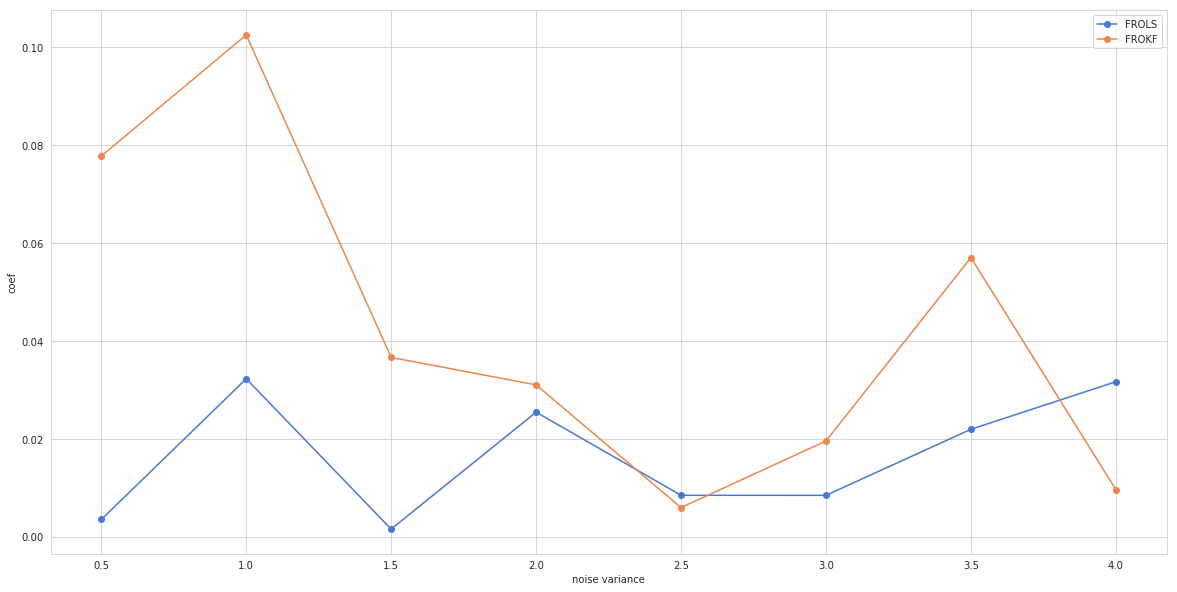

In [480]:
fig = plt.figure(figsize=(20, 10))
y = [linear_ret10.loc[i, 'FROLS_mae'] for i in linear_idx]
_ = plt.plot(noises, y, 'o-', label=f"FROLS {linear_ret10.loc[0, 'term']}")
y = [linear_ret10.loc[i, 'FROKF_mae'] for i in [0, 9, 18, 27, 36, 45, 54, 63]]
_ = plt.plot(noises, y, 'o-', label=f"FROKF {linear_ret10.loc[0, 'term']}")
# y = [linear_ret5.loc[i, 'true_coef'] for i in [0, 9, 18, 27, 36, 45, 54, 63]]
# _ = plt.plot(noises, y, 'o-')
plt.xlabel('noise variance')
plt.ylabel('coef')
plt.legend(['FROLS', 'FROKF'])

- 这里因为有好有坏 所以就统一考虑估计准确的胜率

In [481]:
nonlinear_ret10.groupby(by='FROKF_win_cnt').count()

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae
FROKF_win_cnt,,,,,,,,,
-1,97,97,97,97,97,97,97,97,97
0,8,8,8,8,8,8,8,8,8
1,23,23,23,23,23,23,23,23,23


In [482]:
nonlinear_ret5.groupby(by='FROKF_win_cnt').count()

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae
FROKF_win_cnt,,,,,,,,,
-1,62,62,62,62,62,62,62,62,62
0,3,3,3,3,3,3,3,3,3
1,7,7,7,7,7,7,7,7,7


In [483]:
linear_ret10.groupby(by='FROKF_win_cnt').count()

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae
FROKF_win_cnt,,,,,,,,,
-1,98,98,98,98,98,98,98,98,98
0,5,5,5,5,5,5,5,5,5
1,25,25,25,25,25,25,25,25,25


In [484]:
linear_ret5.groupby(by='FROKF_win_cnt').count()

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae
FROKF_win_cnt,,,,,,,,,
-1,54,54,54,54,54,54,54,54,54
0,6,6,6,6,6,6,6,6,6
1,12,12,12,12,12,12,12,12,12


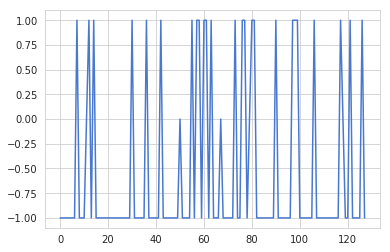

In [485]:
plt.plot(linear_ret10.FROKF_win_cnt)